### Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys
import glob
from oak_cli.utils.logging import logger
from oak_cli.evaluation.localhost_resources.common import CSV_DIR, EvaluationRunCSVKeys
from oak_cli.evaluation.localhost_resources.graph_utils import CPU_AND_MEMORY_KEYS, get_evaluation_run_duration_label, adjust_xticks

### Settings

In [2]:
USE_MINUTES = True

### Error Handing & Checking

In [3]:
if not CSV_DIR.exists():
    logger.error(f"{CSV_DIR} does not exist yet!")
    sys.exit(1)

### Common Graph Configuration

In [4]:
csv_files = glob.glob(f'{CSV_DIR}/*.csv')
df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

# NOTE: The CSV "time-since-start" values are very precise, thus they differ (slightly) between Evaluation-Runs.
# This difference leads to issues when trying to plot them in an aggregated way.
# To fix this we cast the floats to ints instead. I.e. we are looking at whole seconds - which is fine for this concrete use-case.
df[[EvaluationRunCSVKeys.TIME_SINCE_START.value]] = df[[EvaluationRunCSVKeys.TIME_SINCE_START.value]].astype(int)

df.set_index(EvaluationRunCSVKeys.TIME_SINCE_START.value, inplace=True)

if USE_MINUTES:
    df.index = df.index / 60

### Common Graph Styling


In [5]:
sns.set_style("whitegrid")

# Graphs Drawing

### CPU & Memory

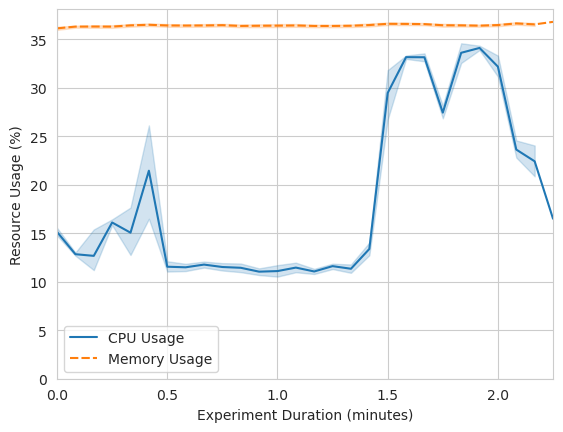

In [6]:
fig, ax = plt.subplots()

sns.lineplot(data=df[CPU_AND_MEMORY_KEYS])

plt.xlabel(get_evaluation_run_duration_label())
plt.ylabel("Resource Usage (%)")
plt.xlim([0, max(df.index)])
plt.ylim(0)
adjust_xticks(ax)

plt.show()

### Disk Space Changes

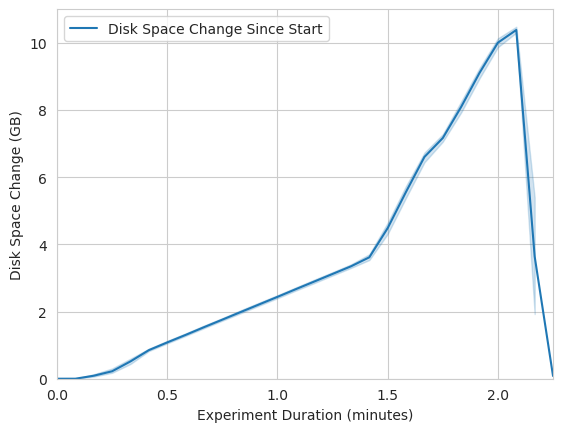

In [7]:
fig, ax = plt.subplots()

disk_space_key = EvaluationRunCSVKeys.DISK_SPACE_CHANGE_SINCE_START.value

# Note: Change MB to GB
df[[disk_space_key]] = df[[disk_space_key]] / 1024

sns.lineplot(data=df[[disk_space_key]])

plt.xlabel(get_evaluation_run_duration_label())
plt.ylabel("Disk Space Change (GB)")
plt.xlim([0, max(df.index)])
plt.ylim(0)
adjust_xticks(ax)

plt.show()

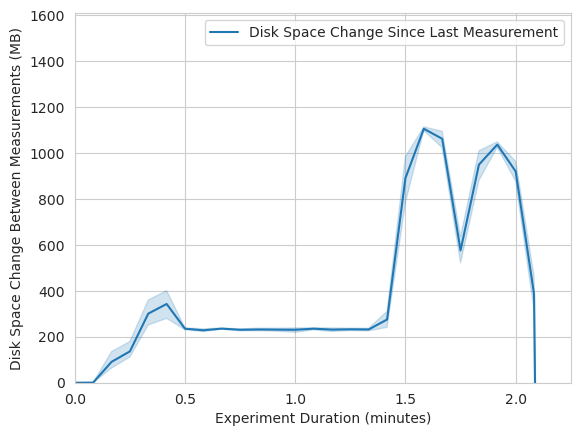

In [8]:
fig, ax = plt.subplots()

disk_space_key = EvaluationRunCSVKeys.DISK_SPACE_CHANGE_SINCE_LAST_MEASUREMENT.value

# Note: Change MB to GB
df[[disk_space_key]] = df[[disk_space_key]]

sns.lineplot(data=df[[disk_space_key]])

plt.xlabel(get_evaluation_run_duration_label())
plt.ylabel("Disk Space Change Between Measurements (MB)")
plt.xlim([0, max(df.index)])
plt.ylim(0)
adjust_xticks(ax)

plt.show()

### Network

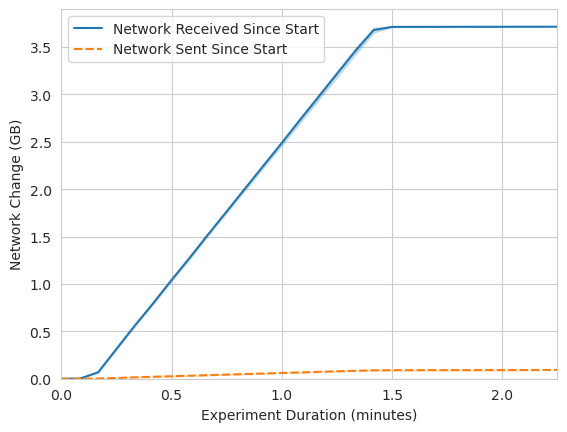

In [9]:
fig, ax = plt.subplots()

NETWORK_COMPARED_TO_START_KEYS = [EvaluationRunCSVKeys.NETWORK_RECEIVED_SINCE_START.value, EvaluationRunCSVKeys.NETWORK_SENT_SINCE_START.value]

sns.lineplot(data=df[NETWORK_COMPARED_TO_START_KEYS] / 1024)

plt.xlabel(get_evaluation_run_duration_label())
plt.ylabel("Network Change (GB)")
plt.xlim([0, max(df.index)])
plt.ylim(0)
adjust_xticks(ax)

plt.show()

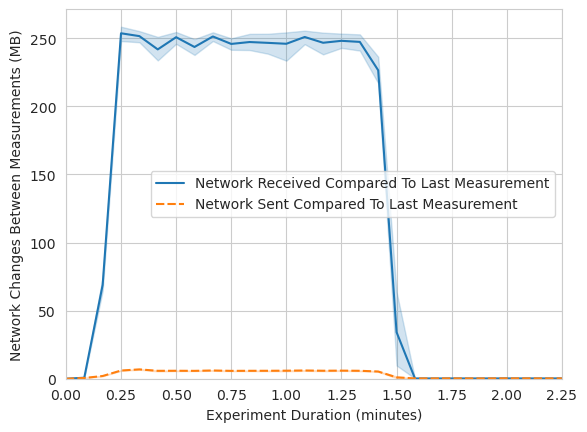

In [10]:
NETWORK_COMPARED_TO_LAST_MEASUREMENT_KEYS = [EvaluationRunCSVKeys.NETWORK_RECEIVED_COMPARED_TO_LAST_MEASUREMENT.value, EvaluationRunCSVKeys.NETWORK_SENT_COMPARED_TO_LAST_MEASUREMENT.value]

sns.lineplot(data=df[NETWORK_COMPARED_TO_LAST_MEASUREMENT_KEYS])
plt.xlabel(get_evaluation_run_duration_label())
plt.ylabel("Network Changes Between Measurements (MB)")

# Constrain axes e.g. start at 0
plt.xlim([0, max(df.index)])
plt.ylim(0)

plt.show()